# THIS IS ML Project Heart Desease prediction

Is is Done by 2005232 Harshvardhan Singh ML_CSE 1 under Guidance of Dr.Rajedeep Chatterjee sir.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# we want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


now reading the csv file which downloaded from kaggle


In [5]:
df = pd.read_csv("Heart_Disease_Prediction.csv")
df.shape # (rows, columns)

(270, 14)

In [6]:
df.head()
df.tail()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [7]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [8]:
df.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [16]:
df.rename(columns = {'Heart Disease':'HeartDisease'}, inplace = True)

In [18]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HearDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [19]:
df.HearDisease.replace(('Presence', 'Absence'), (1, 0), inplace=True)

In [20]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HearDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


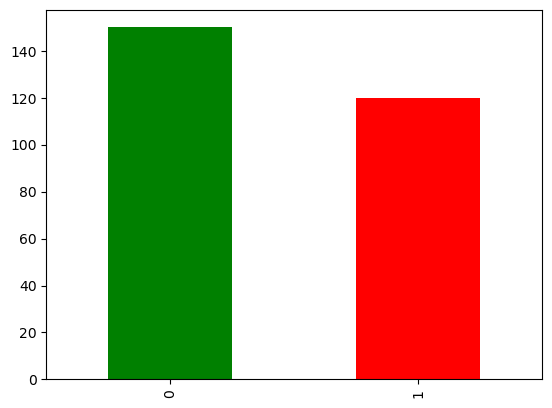

In [22]:
df["HearDisease"].value_counts().plot(kind="bar", color=["green", "red"]);

In [23]:
df.isna().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
HearDisease                0
dtype: int64

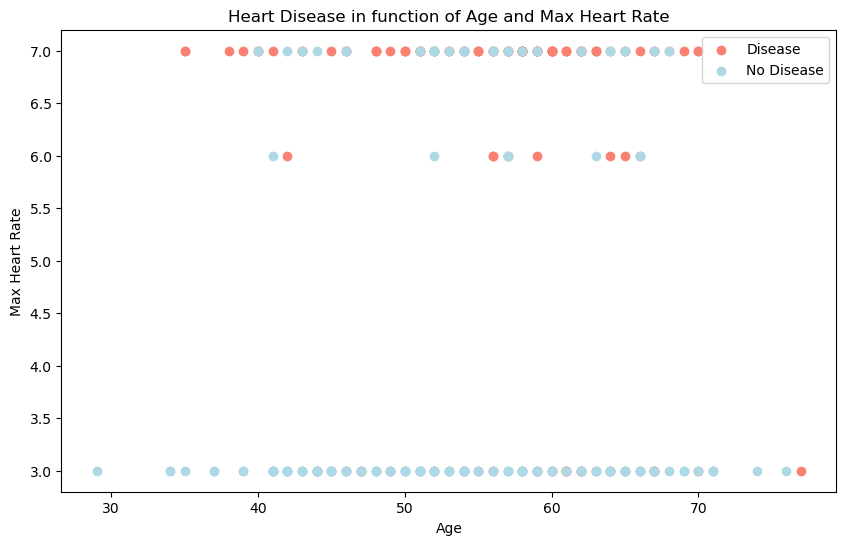

In [24]:
plt.figure(figsize=(10, 6))

# Scatter with postivie examples
plt.scatter(df.Age[df.HearDisease==1],
            df.Thallium[df.HearDisease==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Age[df.HearDisease==0],
            df.Thallium[df.HearDisease==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

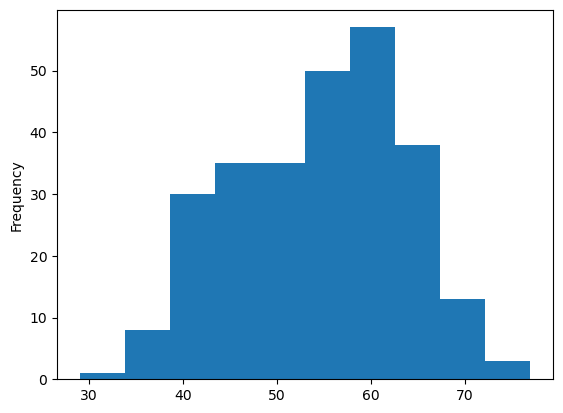

In [25]:
df.Age.plot.hist();

In [26]:
# Make a correlation matrix
df.corr()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HearDisease
Age,1.000000,-0.094401,0.096920,0.273053,0.220056,0.123458,0.128171,-0.402215,0.098297,0.194234,0.159774,0.356081,0.106100,0.212322
Sex,-0.094401,1.000000,0.034636,-0.062693,-0.201647,0.042140,0.039253,-0.076101,0.180022,0.097412,0.050545,0.086830,0.391046,0.297721
Chest pain type,0.096920,0.034636,1.000000,-0.043196,0.090465,-0.098537,0.074325,-0.317682,0.353160,0.167244,0.136900,0.225890,0.262659,0.417436
BP,0.273053,-0.062693,-0.043196,1.000000,0.173019,0.155681,0.116157,-0.039136,0.082793,0.222800,0.142472,0.085697,0.132045,0.155383
Cholesterol,0.220056,-0.201647,0.090465,0.173019,1.000000,0.025186,0.167652,-0.018739,0.078243,0.027709,-0.005755,0.126541,0.028836,0.118021
FBS over 120,0.123458,0.042140,-0.098537,0.155681,0.025186,1.000000,0.053499,0.022494,-0.004107,-0.025538,0.044076,0.123774,0.049237,-0.016319
EKG results,0.128171,0.039253,0.074325,0.116157,0.167652,0.053499,1.000000,-0.074628,0.095098,0.120034,0.160614,0.114368,0.007337,0.182091
Max HR,-0.402215,-0.076101,-0.317682,-0.039136,-0.018739,0.022494,-0.074628,1.000000,-0.380719,-0.349045,-0.386847,-0.265333,-0.253397,-0.418514
Exercise angina,0.098297,0.180022,0.353160,0.082793,0.078243,-0.004107,0.095098,-0.380719,1.000000,0.274672,0.255908,0.153347,0.321449,0.419303
ST depression,0.194234,0.097412,0.167244,0.222800,0.027709,-0.025538,0.120034,-0.349045,0.274672,1.000000,0.609712,0.255005,0.324333,0.417967


NOW WE START MODELLIG

In [28]:
# Split data into X and y
X = df.drop("HearDisease", axis=1)

y = df["HearDisease"]

In [29]:
X

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6


In [30]:
y

0      1
1      0
2      1
3      0
4      0
      ..
265    0
266    0
267    0
268    0
269    1
Name: HearDisease, Length: 270, dtype: int64

In [31]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [32]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [34]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

C:\Users\KIIT\Desktop\ML_PROJECTS\heartdesease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.9074074074074074,
 'KNN': 0.6481481481481481,
 'Random Forest': 0.7962962962962963}

    ABOVE WE CAN SEE SCORE OF 3 MODELS WHICH WE HAVE TRAINED.
    WE CAN SEE LOGISTIC REGRESSION HAVE PERFORMED THE BEST WITH ACCURACY OF 90%.

# COMPARING MODELS  

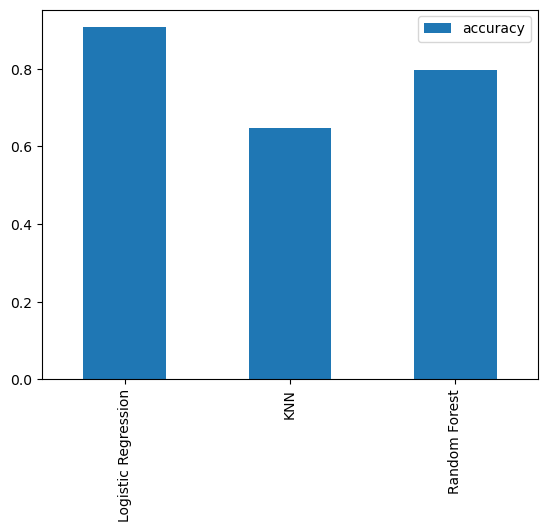

In [35]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();